In [1]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np 
import imutils 
from imutils import paths 
import sklearn 
import os 

In [2]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
dataset = 'Dataset3'
imagePaths = list(paths.list_images(dataset))

In [4]:
imagePaths

['Dataset3\\without_mask\\without_mask_1000.jpg',
 'Dataset3\\without_mask\\without_mask_1001.jpg',
 'Dataset3\\without_mask\\without_mask_1002.jpg',
 'Dataset3\\without_mask\\without_mask_1003.jpg',
 'Dataset3\\without_mask\\without_mask_1004.jpg',
 'Dataset3\\without_mask\\without_mask_1005.jpg',
 'Dataset3\\without_mask\\without_mask_1006.jpg',
 'Dataset3\\without_mask\\without_mask_1007.jpg',
 'Dataset3\\without_mask\\without_mask_1008.jpg',
 'Dataset3\\without_mask\\without_mask_1009.jpg',
 'Dataset3\\without_mask\\without_mask_1010.jpg',
 'Dataset3\\without_mask\\without_mask_1011.jpg',
 'Dataset3\\without_mask\\without_mask_1012.jpg',
 'Dataset3\\without_mask\\without_mask_1013.jpg',
 'Dataset3\\without_mask\\without_mask_1014.jpg',
 'Dataset3\\without_mask\\without_mask_1015.jpg',
 'Dataset3\\without_mask\\without_mask_1016.jpg',
 'Dataset3\\without_mask\\without_mask_1017.jpg',
 'Dataset3\\without_mask\\without_mask_1018.jpg',
 'Dataset3\\without_mask\\without_mask_1019.jpg',


In [5]:
print('Total number of imges in the dataset : ', len(imagePaths))

Total number of imges in the dataset :  4504


In [6]:
#Read all the images and assign them to the labels 
data=[]
labels = []

for i in imagePaths:
    #Extract the labels from the file names
    label = i.split(os.path.sep)[-2]  
    #Load the input images and preprocess it 
    image = load_img(i,target_size=(224,224))
    image = img_to_array(image)
    image = preprocess_input(image)
    #Update the data and label lists
    data.append(image)
    labels.append(label)

C:\Users\Asus\anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [7]:
image.shape

(224, 224, 3)

In [8]:
#To print the labels
labels 

['without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask

In [9]:
#Convert the data and labels to numpy array 
data = np.array(data, dtype= "float32")
labels = np.array(labels)

In [10]:
labels

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In [11]:
#Convert the labels 
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [12]:
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [13]:
#Partition the data into train and test 
(trainX,testX,trainY,testY) = train_test_split(data,labels, test_size = 0.20,stratify=labels,random_state=10)

In [14]:
#Visualizing the data 
print('Number of images in the training set   : ', len(trainX))
print('Number of images in the validation set : ', len(testY))

Number of images in the training set   :  3603
Number of images in the validation set :  901


In [15]:
#Construct the training image generator for data augmentation 
aug = ImageDataGenerator(
                         rotation_range = 40,
                         zoom_range = 0.25,
                         width_shift_range = 0.2,
                         height_shift_range = 0.2,
                         shear_range = 0.2,
                         horizontal_flip = True,
                         fill_mode ='nearest')

In [16]:
#Load the pre trained model 
baseModel = MobileNetV2(weights='imagenet', include_top = False, input_shape =(224,224,3))

In [17]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [18]:
#Constructing the head of the model that will be placed on the top of the base model 
headModel = baseModel.output
headModel = AveragePooling2D(pool_size = (7,7))(headModel)
headModel = Flatten(name = 'flatten')(headModel)
headModel = Dense(128, activation = 'relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation = 'softmax')(headModel)

In [19]:
#Place the headModel on the top of the baseModel 
model = Model(inputs= baseModel.input, outputs = headModel)

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [21]:
#Freeze the layers of base model so they will not be update 
for layer in baseModel.layers:
    layer.trainable = False 

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [23]:
INIT_LR = 0.0001
EPOCHS= 30
BATCH_SIZE = 32

print('The batch_size of the images : ', BATCH_SIZE)
print('The epoch value for the training the model : ', EPOCHS)

The batch_size of the images :  32
The epoch value for the training the model :  30


In [24]:
#Compile the Model
opt = Adam(learning_rate = INIT_LR, decay = INIT_LR/EPOCHS)
model.compile(loss='binary_crossentropy', optimizer = opt, metrics=['accuracy'])

In [25]:
#Train the Model
H = model.fit(
              aug.flow(trainX, trainY, batch_size = BATCH_SIZE),
              steps_per_epoch = len(trainX)//BATCH_SIZE,
              validation_data = (testX,testY),
              validation_steps = len(testX)//BATCH_SIZE,
              epochs = EPOCHS,
              )

Epoch 1/30
112/112 [==============================] - 114s 983ms/step - loss: 0.4391 - accuracy: 0.8351 - val_loss: 0.1560 - val_accuracy: 0.9745
Epoch 2/30
112/112 [==============================] - 195s 2s/step - loss: 0.1787 - accuracy: 0.9532 - val_loss: 0.0768 - val_accuracy: 0.9900
Epoch 3/30
112/112 [==============================] - 183s 2s/step - loss: 0.1288 - accuracy: 0.9656 - val_loss: 0.0560 - val_accuracy: 0.9889
Epoch 4/30
112/112 [==============================] - 182s 2s/step - loss: 0.1130 - accuracy: 0.9633 - val_loss: 0.0530 - val_accuracy: 0.9845
Epoch 5/30
112/112 [==============================] - 199s 2s/step - loss: 0.0845 - accuracy: 0.9765 - val_loss: 0.0418 - val_accuracy: 0.9900
Epoch 6/30
112/112 [==============================] - 196s 2s/step - loss: 0.0840 - accuracy: 0.9700 - val_loss: 0.0385 - val_accuracy: 0.9900
Epoch 7/30
112/112 [==============================] - 198s 2s/step - loss: 0.0784 - accuracy: 0.9745 - val_loss: 0.0365 - val_accuracy: 0.9

Text(0.5, 1.0, 'Training and Validation Loss')

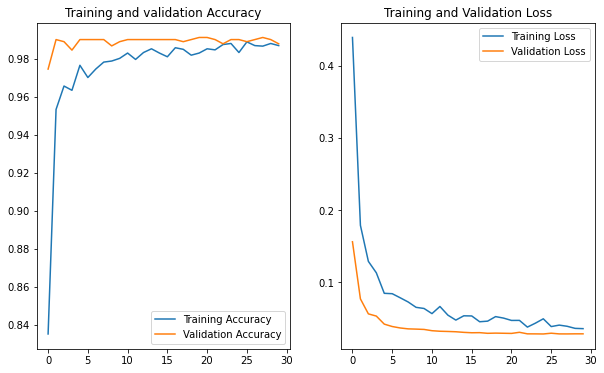

In [26]:
#Plot the training results 
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']

loss = H.history['loss']
val_loss = H.history['val_loss']

epochs_range = range(30)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss, label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc ='upper right')
plt.title('Training and Validation Loss')


In [27]:
#Predict the results 
predict = model.predict(testX,batch_size = BATCH_SIZE)
predict = np.argmax(predict,axis=1)
print(classification_report(testY.argmax(axis=1),predict,target_names= lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       445
without_mask       0.99      0.99      0.99       456

    accuracy                           0.99       901
   macro avg       0.99      0.99      0.99       901
weighted avg       0.99      0.99      0.99       901



In [29]:
#To save the model 
model.save('mobilenetv2_face_mask_detector_dataset3.h5')